# Main Notebook to run the code

#### Imports

In [32]:
import pandas as pd 
import holidays
import numpy as np 
import matplotlib.pyplot as plt 
from Utils import EDA,DataSelectSplit,DataClean,DataTransform,DataEnrich,DataPrep,model,metrics,VIF,featureEngineering,DataTransform,test
from Utils import model
import seaborn as sns
df= pd.read_csv('data/Retail_Dataset.csv')
eda= EDA.EDA(df)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option("display.max_colwidth",None)
df.columns

Index(['week', 'weekly_revenue', 'seasonality_index', 'economic_index',
       'avg_discount_rate', 'temperature', 'facebook_spend', 'facebook_impr',
       'facebook_clicks', 'instagram_spend', 'instagram_impr',
       'instagram_clicks', 'youtube_spend', 'youtube_impr', 'youtube_clicks',
       'search_brand_spend', 'search_brand_impr', 'search_brand_clicks',
       'search_generic_spend', 'search_generic_impr', 'search_generic_clicks',
       'display_programmatic_spend', 'display_programmatic_impr',
       'display_programmatic_clicks', 'display_direct_spend',
       'display_direct_impr', 'display_direct_clicks', 'tv_national_spend',
       'tv_national_trps', 'tv_regional_spend', 'tv_regional_trps',
       'radio_spend', 'radio_spots', 'ooh_spend', 'ooh_faces', 'print_spend',
       'print_reach', 'influencer_tier1_spend', 'influencer_tier2_spend'],
      dtype='object')

## Exploratory Data Analysis

#### Initial Read of the data

In [33]:
df.head(10)

,week,weekly_revenue,seasonality_index,economic_index,avg_discount_rate,temperature,facebook_spend,facebook_impr,facebook_clicks,instagram_spend,instagram_impr,instagram_clicks,youtube_spend,youtube_impr,youtube_clicks,search_brand_spend,search_brand_impr,search_brand_clicks,search_generic_spend,search_generic_impr,search_generic_clicks,display_programmatic_spend,display_programmatic_impr,display_programmatic_clicks,display_direct_spend,display_direct_impr,display_direct_clicks,tv_national_spend,tv_national_trps,tv_regional_spend,tv_regional_trps,radio_spend,radio_spots,ooh_spend,ooh_faces,print_spend,print_reach,influencer_tier1_spend,influencer_tier2_spend
0,2023-01-01,52483.570765,0.000000,99.677429,11.545143,22.476249,5948.463249,0.000690,0.014581,5232.240478,0.000362,0.006929,6574.352195,0.000567,0.011253,2877.652281,0.000247,0.004849,7459.639512,0.000557,0.010397,7496.008218,0.000560,0.008462,7857.451819,0.000572,0.004239,11480.784527,95.673204,8467.571824,105.844648,5812.194092,29,3753.341621,250.222775,2485.042894,309911.245903,3051.473847,1936.681969
1,2023-01-08,50514.045297,0.120537,100.808102,21.558194,23.645896,4581.454134,0.000532,0.011230,8419.662396,0.000582,0.011149,8478.869362,0.000732,0.014513,3766.581281,0.000323,0.006347,6955.233278,0.000519,0.009694,6384.085144,0.000477,0.007206,8680.118497,0.000632,0.004683,12046.757337,100.389644,4888.228902,61.102861,6138.752935,31,3381.178579,225.411905,1976.972019,246549.410854,4393.439879,1889.406204
2,2023-01-15,55631.599333,0.239316,103.772372,11.712672,26.309593,5610.112909,0.000651,0.013751,8125.293657,0.000562,0.010760,6549.621504,0.000565,0.011211,3235.323230,0.000278,0.005452,6753.924495,0.000504,0.009413,7697.992661,0.000576,0.008690,9316.968080,0.000679,0.005026,8711.215128,72.593459,8661.800853,108.272511,4135.274787,21,4289.793142,285.986209,803.072206,100151.634632,3991.275845,1736.287162
3,2023-01-22,61161.198152,0.354605,100.349156,13.406697,23.609060,4103.734452,0.000476,0.010059,7650.151750,0.000529,0.010130,6681.671340,0.000577,0.011437,6090.025960,0.000522,0.010263,6709.148625,0.000501,0.009351,8774.974298,0.000656,0.009905,7174.176320,0.000523,0.003870,7679.907935,63.999233,9667.118506,120.838981,1113.497144,6,3673.241934,244.882796,3118.892360,388959.007294,2744.167776,675.410033
4,2023-01-29,53476.464847,0.464723,100.515101,12.862005,26.693091,5086.793577,0.000590,0.012469,7972.405161,0.000551,0.010557,7595.920191,0.000656,0.013002,5339.106043,0.000458,0.008997,5826.402476,0.000435,0.008120,7066.475935,0.000528,0.007977,8711.761610,0.000635,0.004700,16783.595966,139.863300,4012.609492,50.157619,4180.714104,21,2861.624793,190.774986,3015.871505,376111.212312,2991.324478,1867.964000
5,2023-02-05,54509.962683,0.568065,99.851108,11.954174,24.749847,6015.189475,0.000698,0.014744,8008.678374,0.000554,0.010605,6787.812779,0.000586,0.011619,5387.526345,0.000462,0.009079,6552.705139,0.000489,0.009133,8486.202950,0.000635,0.009579,7594.592501,0.000553,0.004097,9459.216926,78.826808,8748.214111,109.352676,5587.806979,28,1775.802735,118.386849,2303.171681,287229.973732,3130.463178,759.388135
6,2023-02-12,64527.290660,0.663123,96.162458,9.054192,27.603726,2064.333155,0.000240,0.005060,7011.119368,0.000485,0.009284,5942.176772,0.000513,0.010171,4356.768391,0.000374,0.007342,6689.543085,0.000499,0.009323,8072.845022,0.000604,0.009113,7460.493865,0.000544,0.004025,9025.944117,75.216201,10455.459150,130.693239,2781.753812,14,2791.097908,186.073194,2547.014667,317639.784301,2903.678770,2271.341172
7,2023-02-19,61322.281127,0.748511,99.946972,12.276908,27.094678,4018.056075,0.000466,0.009849,7202.561057,0.000498,0.009538,6077.785534,0.000525,0.010403,5548.233309,0.000476,0.009350,8442.764596,0.000630,0.011767,8186.958250,0.000612,0.009242,8516.801297,0.000621,0.004595,5539.971018,46.166425,5580.859322,69.760742,5275.181239,26,2149.620905,143.308060,2861.298812,356834.355562,1673.434878,1256.105184
8,2023-02-26,55882.466729,0.822984,100.120460,7.681524,28.520827,52

In [34]:
rows,cols= df.shape
print(f"# of rows: {rows}\n# of columns: {cols}") 

# of rows: 104
# of columns: 39


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   week                         104 non-null    object 
 1   weekly_revenue               104 non-null    float64
 2   seasonality_index            104 non-null    float64
 3   economic_index               104 non-null    float64
 4   avg_discount_rate            104 non-null    float64
 5   temperature                  104 non-null    float64
 6   facebook_spend               104 non-null    float64
 7   facebook_impr                104 non-null    float64
 8   facebook_clicks              104 non-null    float64
 9   instagram_spend              104 non-null    float64
 10  instagram_impr               104 non-null    float64
 11  instagram_clicks             104 non-null    float64
 12  youtube_spend                98 non-null     float64
 13  youtube_impr        

In [36]:
eda.numeric_summary()

,count,mean,std,min,25%,50%,75%,max
weekly_revenue,104.0,5.003050e+04,9881.957682,30492.231206,42677.955273,5.042859e+04,56563.567422,89604.963664
seasonality_index,104.0,1.294371e-17,0.710531,-1.000000,-0.684470,1.836970e-16,0.684470,1.000000
economic_index,104.0,1.001342e+02,1.897485,96.162458,98.417215,1.003592e+02,101.193119,105.440338
avg_discount_rate,104.0,1.026299e+01,3.024811,5.000000,8.110226,1.020112e+01,12.104556,21.558194
temperature,104.0,2.014646e+01,7.931359,5.866555,12.760365,2.027869e+01,26.736317,36.496498
facebook_spend,104.0,4.684067e+03,1074.584627,2064.333155,3959.408773,4.727842e+03,5424.622891,6847.599189
facebook_impr,104.0,5.436972e-04,0.000125,0.000240,0.000460,5.487783e-04,0.000630,0.000795
facebook_clicks,104.0,1.148141e-02,0.002634,0.005060,0.009705,1.158871e-02,0.013297,0.016785
instagram_spend,104.0,7.775436e+03,1065.934610,4994.388457,7163.377312,7.840725e+03,8513.738225,10519.262084
instagram_impr,104.0,5.378134e-04,0.000074,0.000345,0.000495,5.423294e-04,0.000589,0.000728


#### Checking the data shape and statistical values

In [37]:
eda.outlier_summary()  

,lower,upper,n_outliers
display_direct_clicks,0.002863,0.005694,2.0
display_direct_impr,0.000395,0.000757,2.0
tv_regional_spend,2984.136025,12749.630491,2.0
print_reach,70785.353884,554788.303106,2.0
print_spend,567.596830,4448.605039,2.0
tv_regional_trps,37.301700,159.370381,2.0
display_direct_spend,5424.770487,10385.514994,2.0
ooh_spend,424.523656,5778.511425,1.0
ooh_faces,28.301577,385.234095,1.0
avg_discount_rate,2.118731,18.096050,1.0


In [38]:
eda.missing_report()

,missing,%_missing
youtube_spend,6,5.769231
display_direct_clicks,6,5.769231


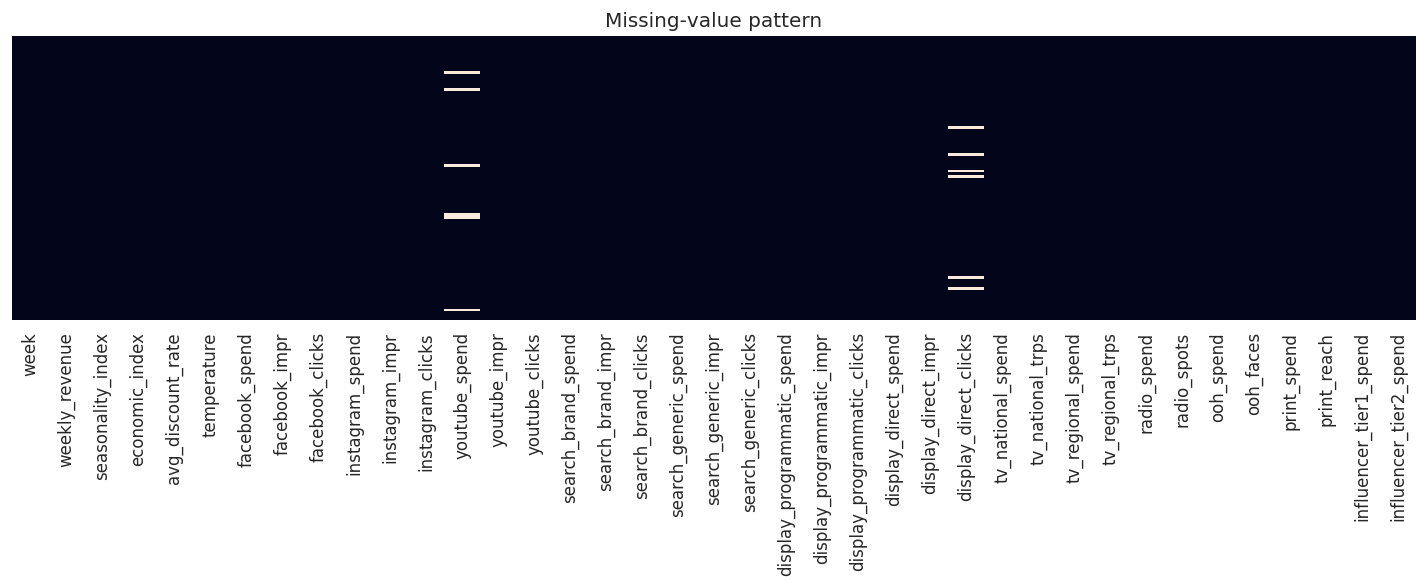

In [39]:
eda.plot_missing_heatmap()

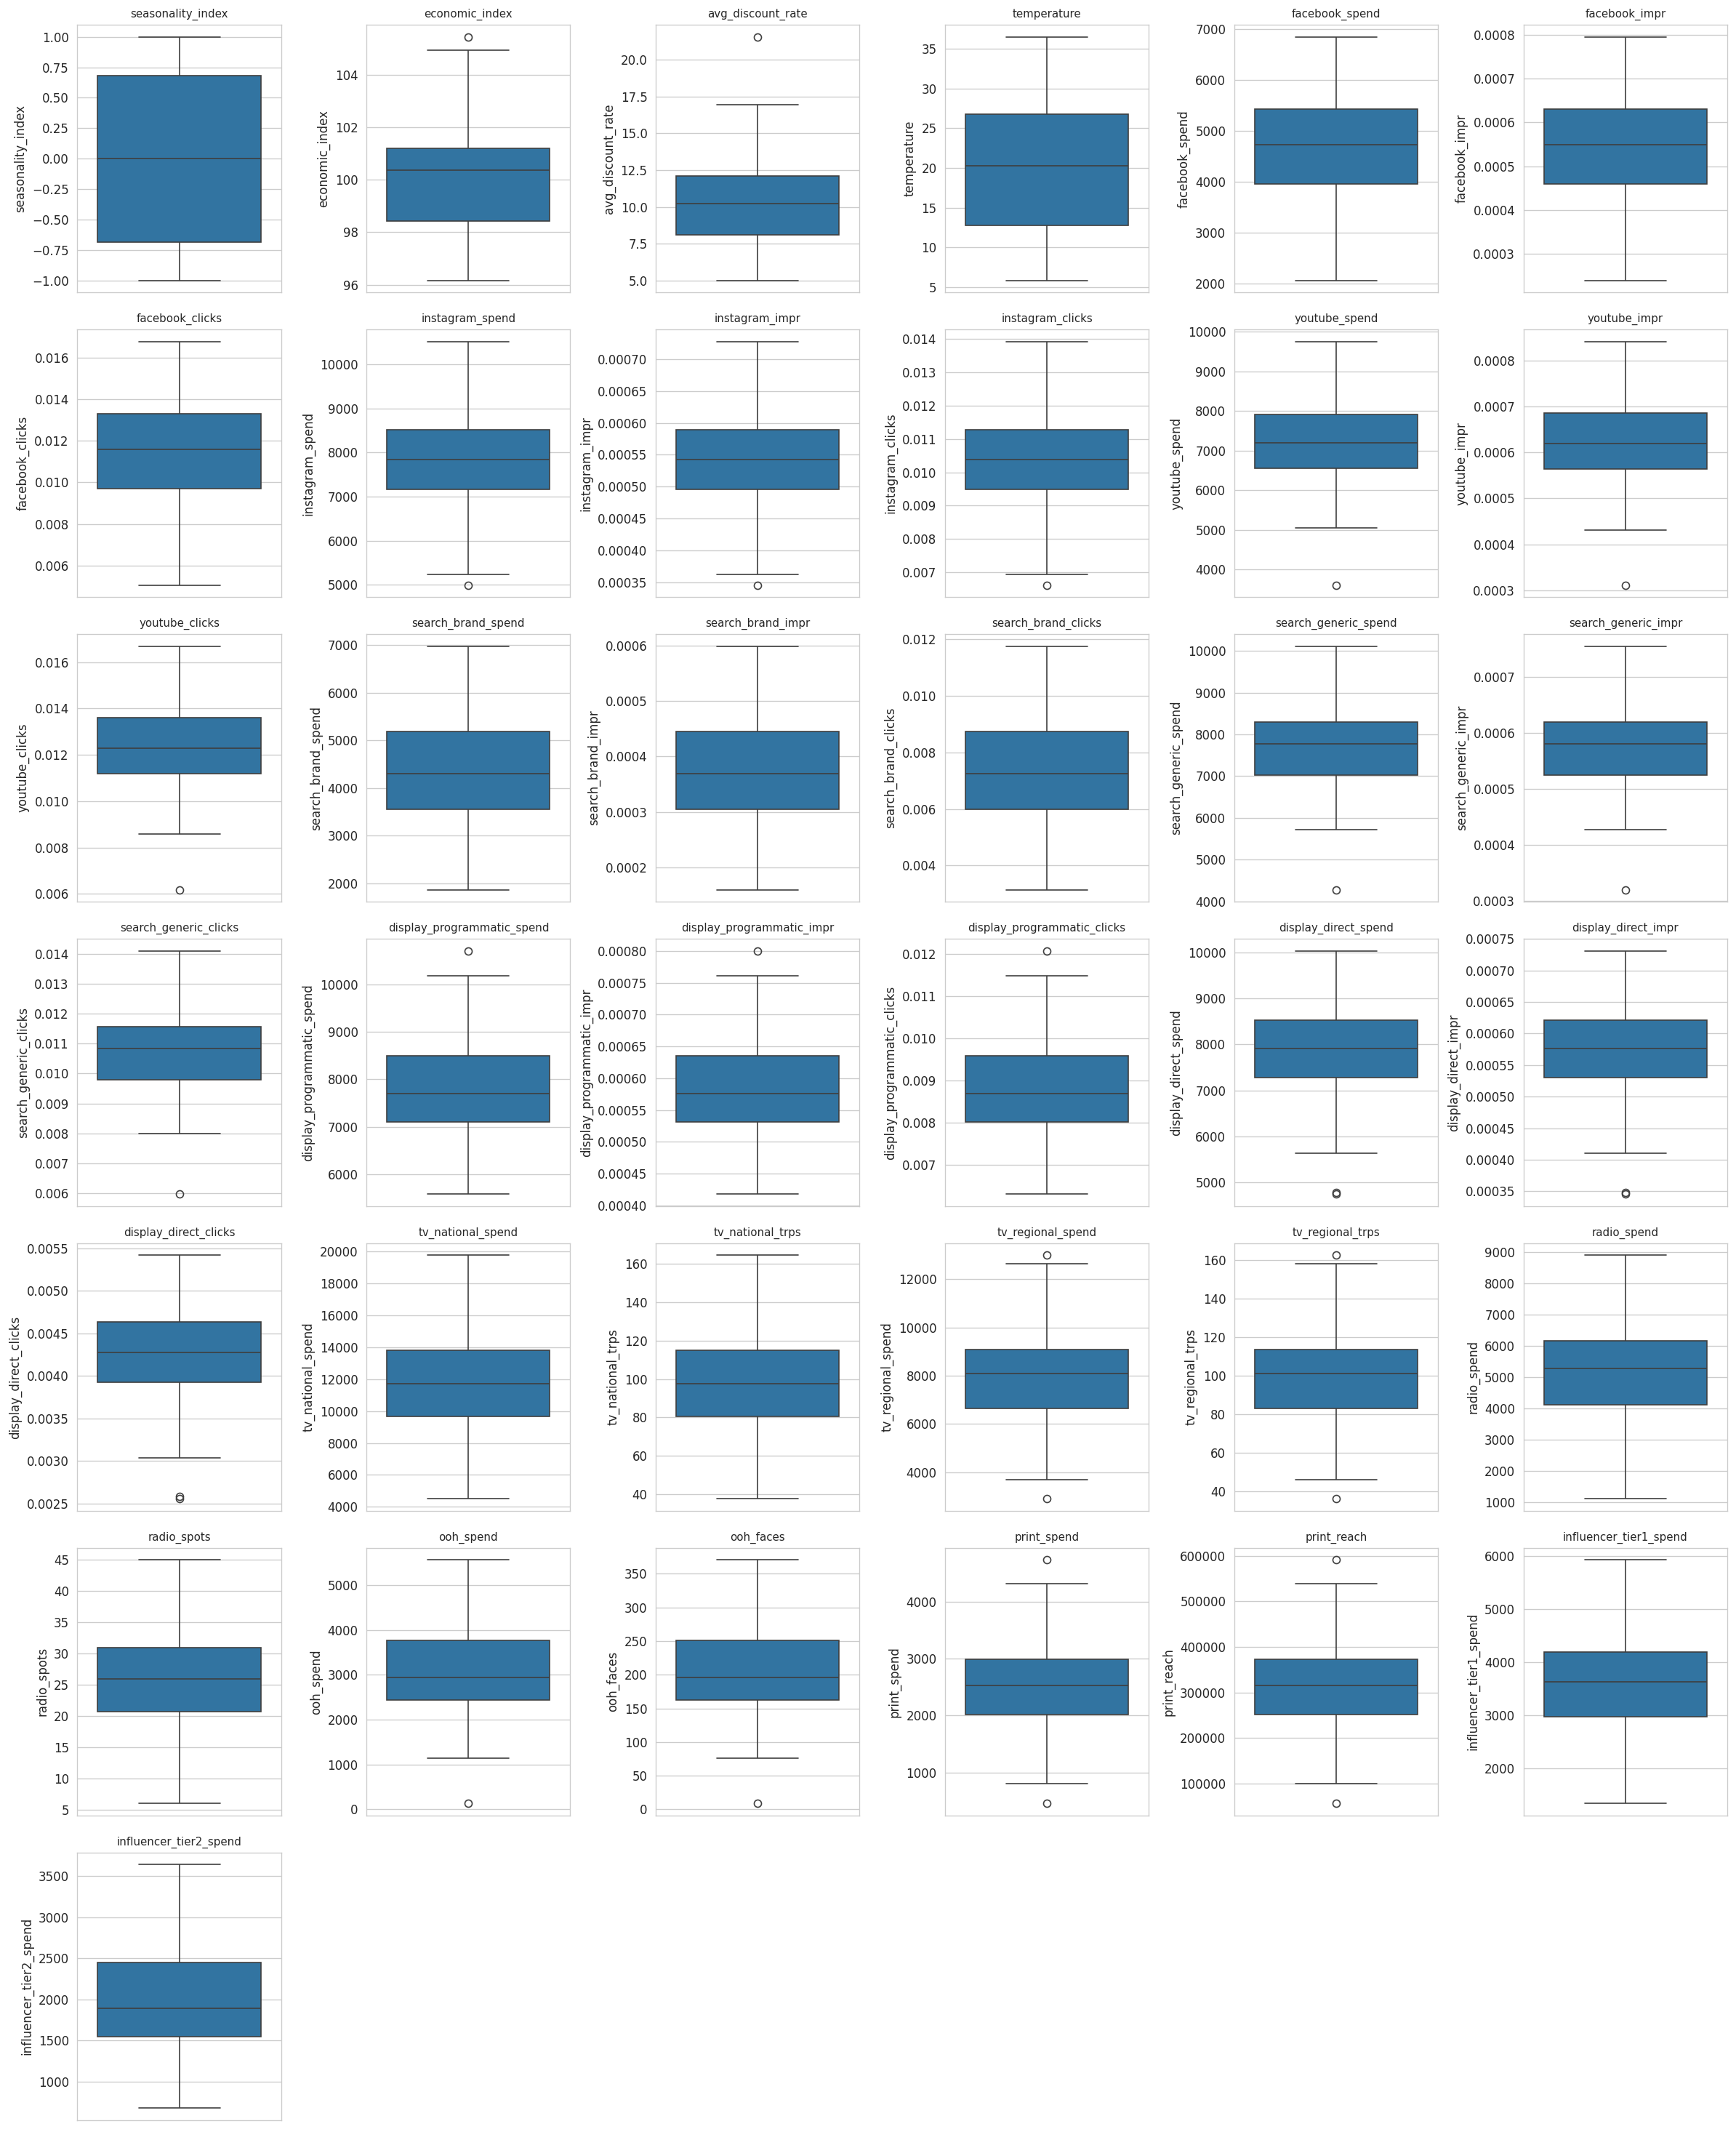

In [40]:
features= df.drop(columns=['weekly_revenue','week'])
n_cols= 6
n_rows= (len(features.columns)+n_cols-1)//n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3.5 * n_rows))
axes = axes.flatten()
for i, col in enumerate(features.columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=9)
    axes[i].tick_params(axis='x', labelrotation=45)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

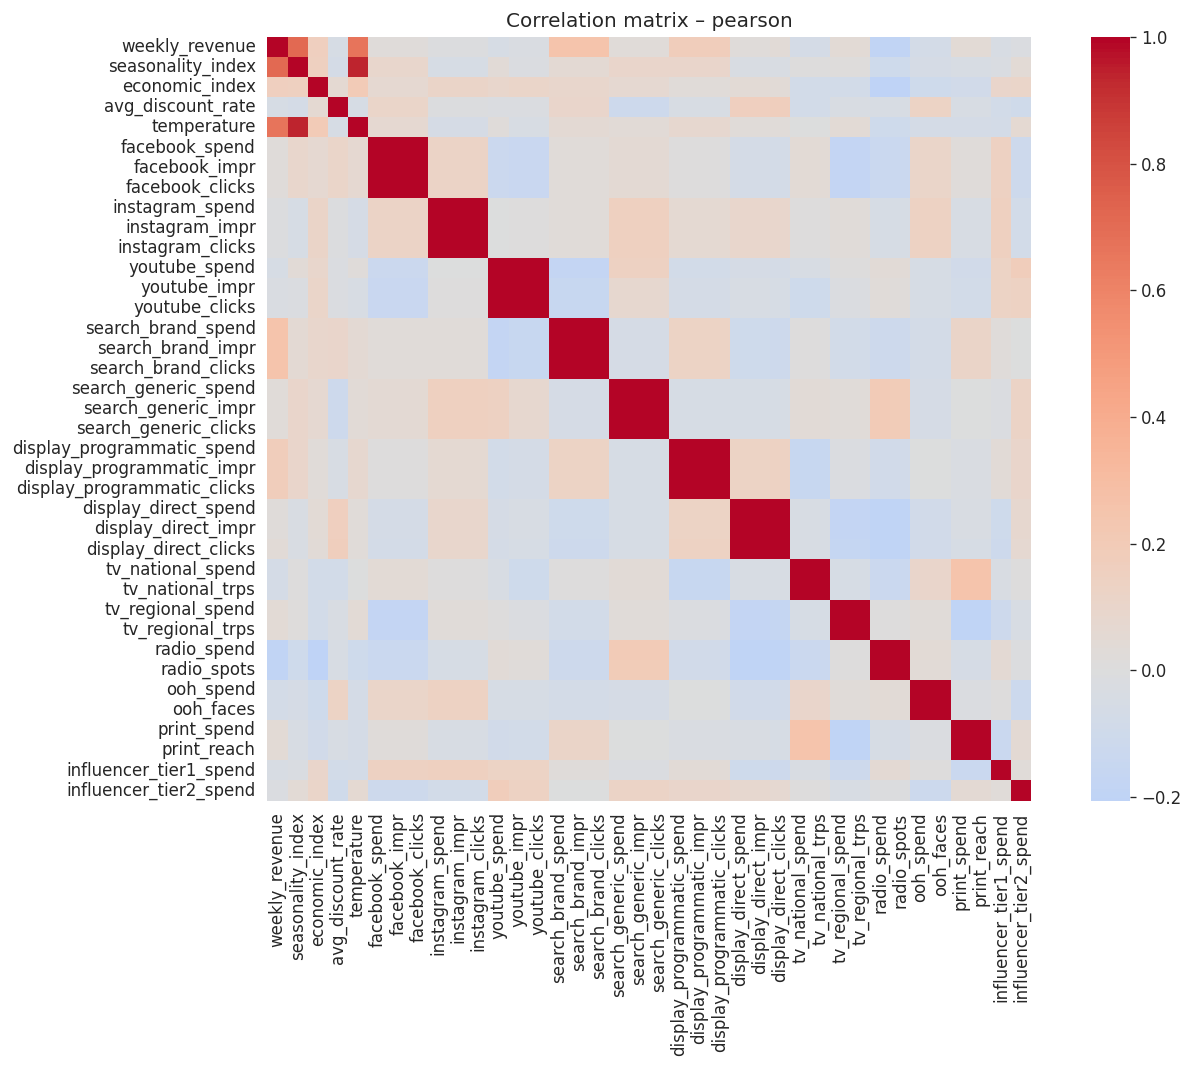

In [41]:
eda.corr_heatmap()

In [42]:
eda.corr_matrix()


,weekly_revenue,seasonality_index,economic_index,avg_discount_rate,temperature,facebook_spend,facebook_impr,facebook_clicks,instagram_spend,instagram_impr,instagram_clicks,youtube_spend,youtube_impr,youtube_clicks,search_brand_spend,search_brand_impr,search_brand_clicks,search_generic_spend,search_generic_impr,search_generic_clicks,display_programmatic_spend,display_programmatic_impr,display_programmatic_clicks,display_direct_spend,display_direct_impr,display_direct_clicks,tv_national_spend,tv_national_trps,tv_regional_spend,tv_regional_trps,radio_spend,radio_spots,ooh_spend,ooh_faces,print_spend,print_reach,influencer_tier1_spend,influencer_tier2_spend
weekly_revenue,1.000000,0.712744,0.162848,-0.047617,0.669247,0.018312,0.018312,0.018312,-0.011864,-0.011864,-0.011864,-0.049818,-0.028381,-0.028381,0.253180,0.253180,0.253180,0.029544,0.029544,0.029544,0.176240,0.176240,0.176240,0.023207,0.023207,0.038067,-0.068271,-0.068271,0.040882,0.040882,-0.190881,-0.189974,-0.073381,-0.073381,0.046420,0.046420,-0.038015,-0.019496
seasonality_index,0.712744,1.000000,0.150026,-0.066854,0.940845,0.087620,0.087620,0.087620,-0.053079,-0.053079,-0.053079,0.035418,-0.017543,-0.017543,0.050900,0.050900,0.050900,0.096207,0.096207,0.096207,0.103250,0.103250,0.103250,-0.031626,-0.031626,-0.034144,0.001432,0.001432,0.015017,0.015017,-0.104790,-0.103000,-0.055411,-0.055411,-0.039362,-0.039362,-0.023763,0.048228
economic_index,0.162848,0.150026,1.000000,0.059841,0.202814,0.071748,0.071748,0.071748,0.112878,0.112878,0.112878,0.091552,0.109251,0.109251,0.091890,0.091890,0.091890,0.067226,0.067226,0.067226,0.030055,0.030055,0.030055,0.042944,0.042944,0.034762,-0.081332,-0.081332,-0.080395,-0.080395,-0.205848,-0.203219,-0.100342,-0.100342,-0.087576,-0.087576,0.103860,0.105267
avg_discount_rate,-0.047617,-0.066854,0.059841,1.000000,-0.046150,0.105442,0.105442,0.105442,-0.011625,-0.011625,-0.011625,-0.020189,-0.016084,-0.016084,0.098183,0.098183,0.098183,-0.113394,-0.113394,-0.113394,-0.036964,-0.036964,-0.036964,0.158088,0.158088,0.169509,-0.081561,-0.081561,-0.034117,-0.034117,-0.039418,-0.041529,0.124795,0.124795,-0.040945,-0.040945,-0.076753,-0.095307
temperature,0.669247,0.940845,0.202814,-0.046150,1.000000,0.070293,0.070293,0.070293,-0.055410,-0.055410,-0.055410,0.017390,-0.040367,-0.040367,0.056277,0.056277,0.056277,0.035325,0.035325,0.035325,0.080113,0.080113,0.080113,0.027314,0.027314,0.026225,-0.006695,-0.006695,0.046386,0.046386,-0.100245,-0.098874,-0.061052,-0.061052,-0.060840,-0.060840,-0.069959,0.061213
facebook_spend,0.018312,0.087620,0.071748,0.105442,0.070293,1.000000,1.000000,1.000000,0.121927,0.121927,0.121927,-0.123914,-0.143849,-0.143849,0.031178,0.031178,0.031178,0.054764,0.054764,0.054764,0.002612,0.002612,0.002612,-0.069075,-0.069075,-0.073455,0.045322,0.045322,-0.169380,-0.169380,-0.133191,-0.134486,0.106461,0.106461,0.017690,0.017690,0.143647,-0.111354
facebook_impr,0.018312,0.087620,0.071748,0.105442,0.070293,1.000000,1.000000,1.000000,0.121927,0.121927,0.121927,-0.123914,-0.143849,-0.143849,0.031178,0.031178,0.031178,0.054764,0.054764,0.054764,0.002612,0.002612,0.002612,-0.069075,-0.069075,-0.073455,0.045322,0.045322,-0.169380,-0.169380,-0.133191,-0.134486,0.106461,0.106461,0.017690,0.017690,0.143647,-0.111354
facebook_clicks,0.018312,0.087620,0.071748,0.105442,0.070293,1.000000,1.000000,1.000000,0.121927,0.121927,0.121927,-0.123914,-0.143849,-0.143849,0.031178,0.031178,0.031178,0.054764,0.054764,0.054764,0.002612,0.002612,0.002612,-0.069075,-0.069075,-0.073455,0.045322,0.045322,-0.169380,-0.169380,-0.133191,-0.134486,0.106461,0.106461,0.017690,0.017690,0.143647,-0.111354
instagram_spend,-0.011864,-0.053079,0.112878,-0.011625,-0.055410,0.121927,0.121927,0.121927,1.000000,1.000000,1.000000,-0.003037,0.006440,0.006440,0.029693,0.029693,0.029693,0.150288,0.150288,0.150288,0.060255,0.060255,0.060255,0.090762,0.090762,0.095019,0.009134,0.009134,0.028924,0.028924,-0.051727,-0.048336,0.140418,0.140418,-0.039852,-0.039852,0.155140,-0.0809

<Figure size 1440x600 with 0 Axes>

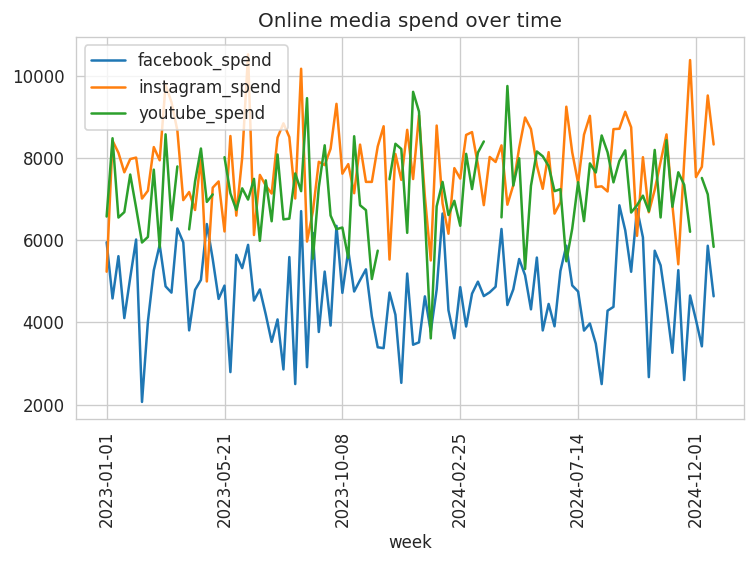

In [43]:
eda.plot_spend_trend()

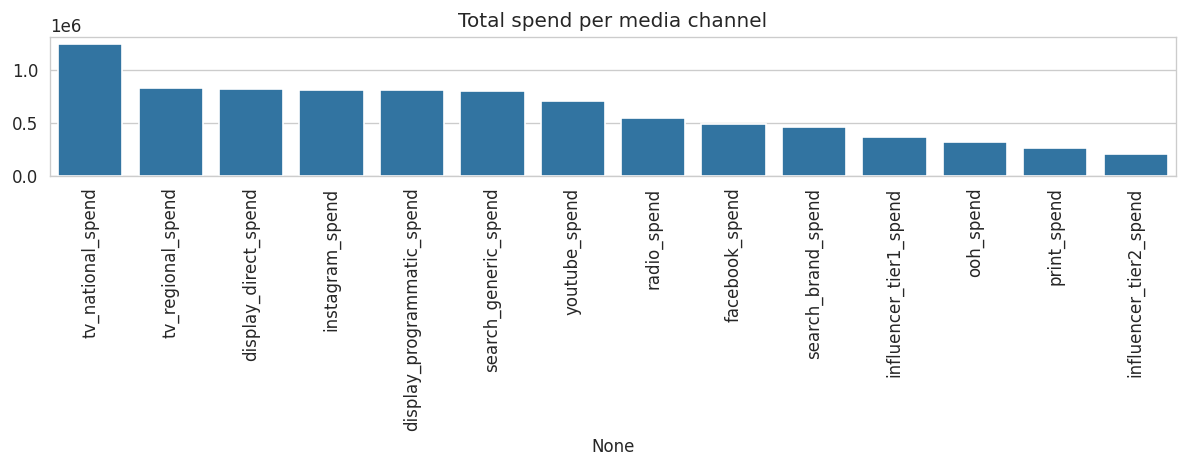

In [44]:
eda.total_spend_bar()

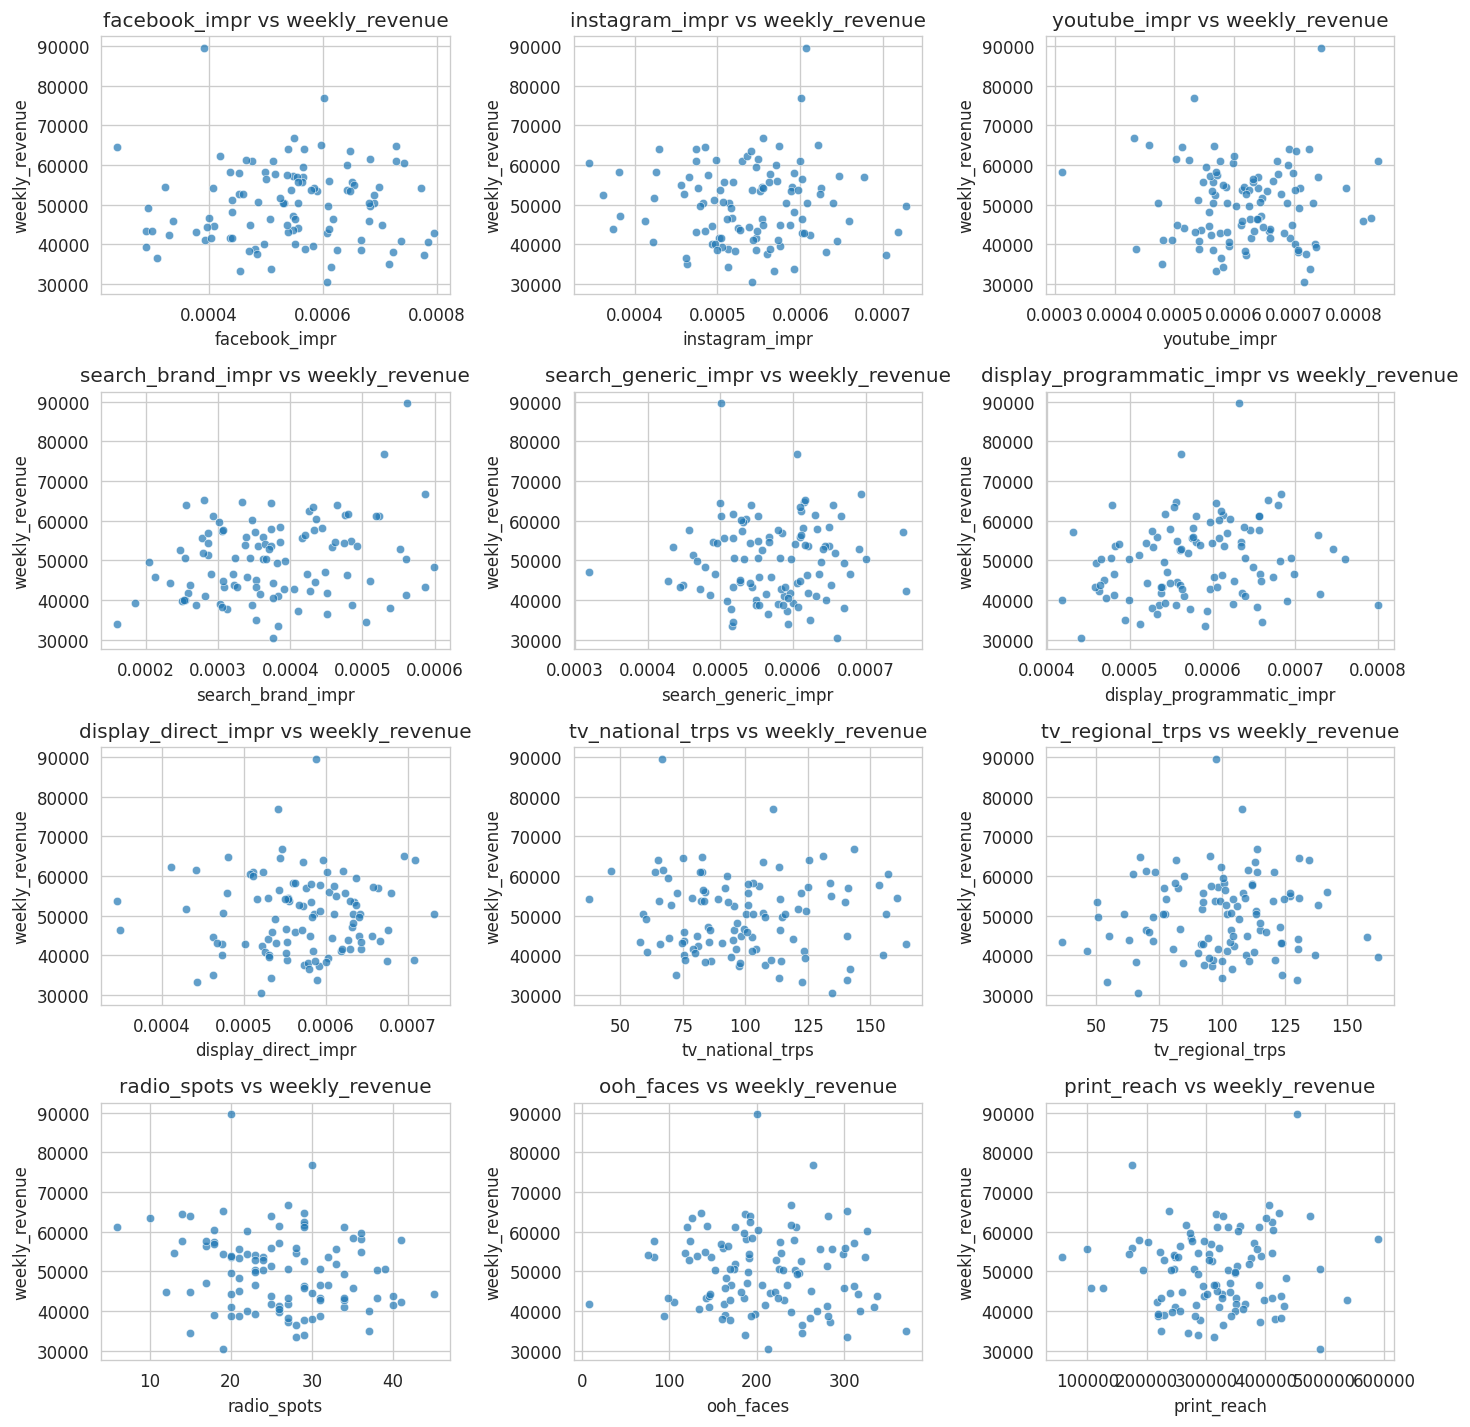

In [45]:
eda.scatter_vs_target(eda.impr_cols,save_path="image_1.png")

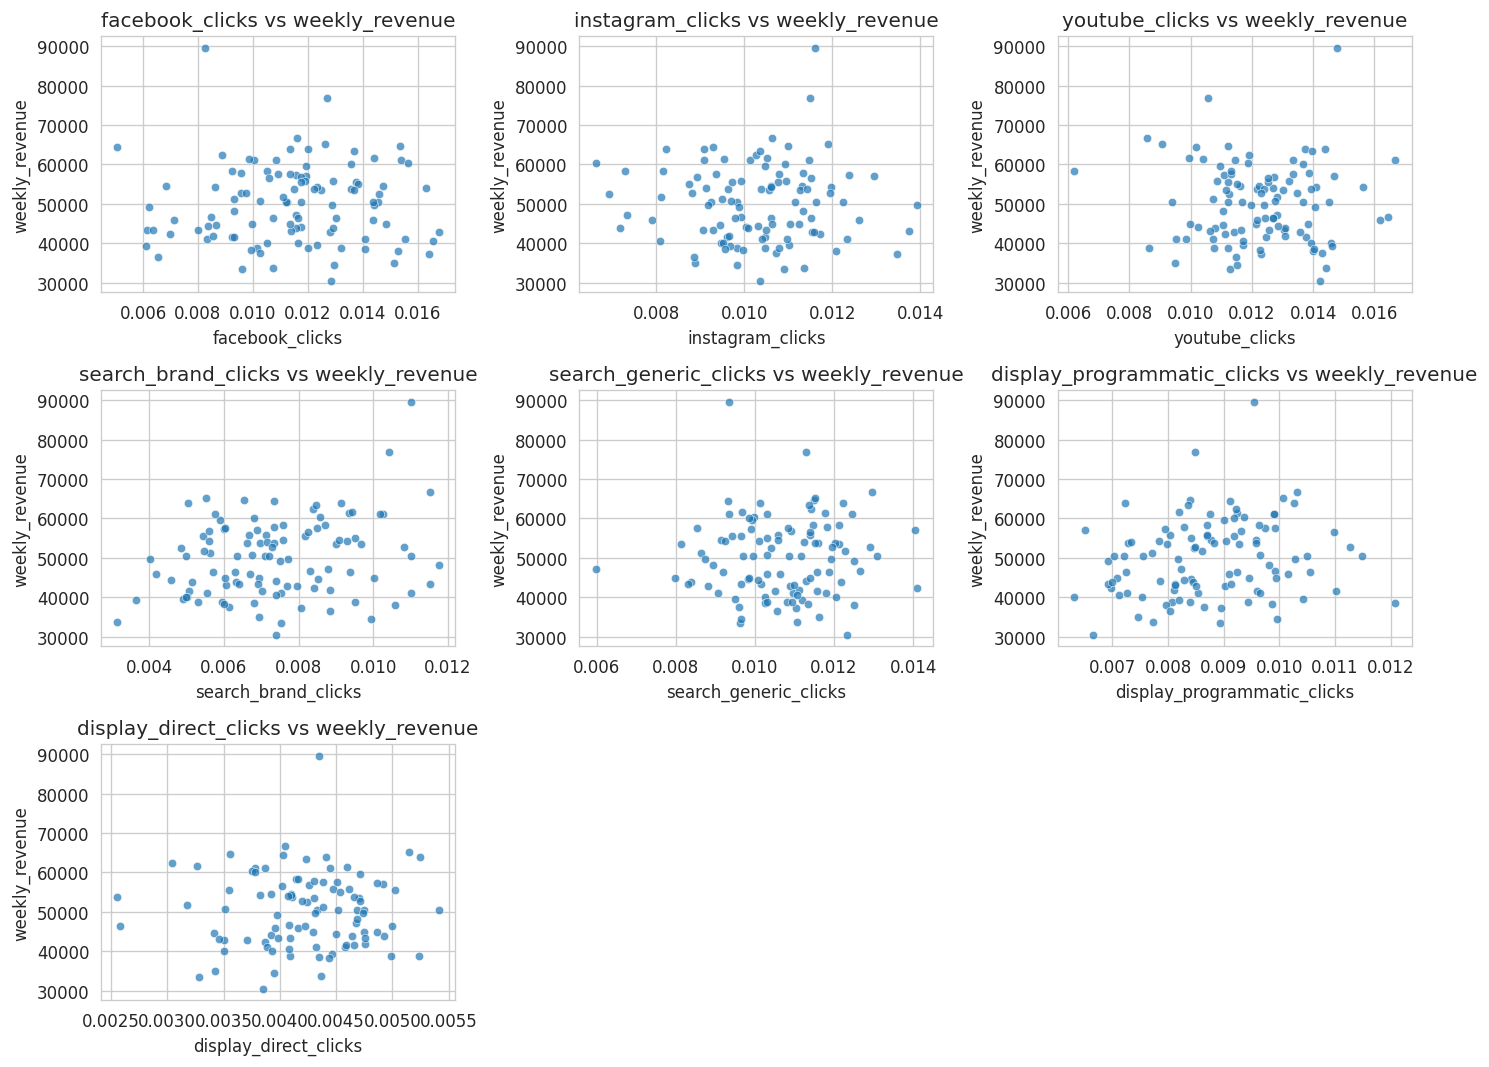

In [46]:
eda.scatter_vs_target(eda.clicks_cols,'image_2.png')

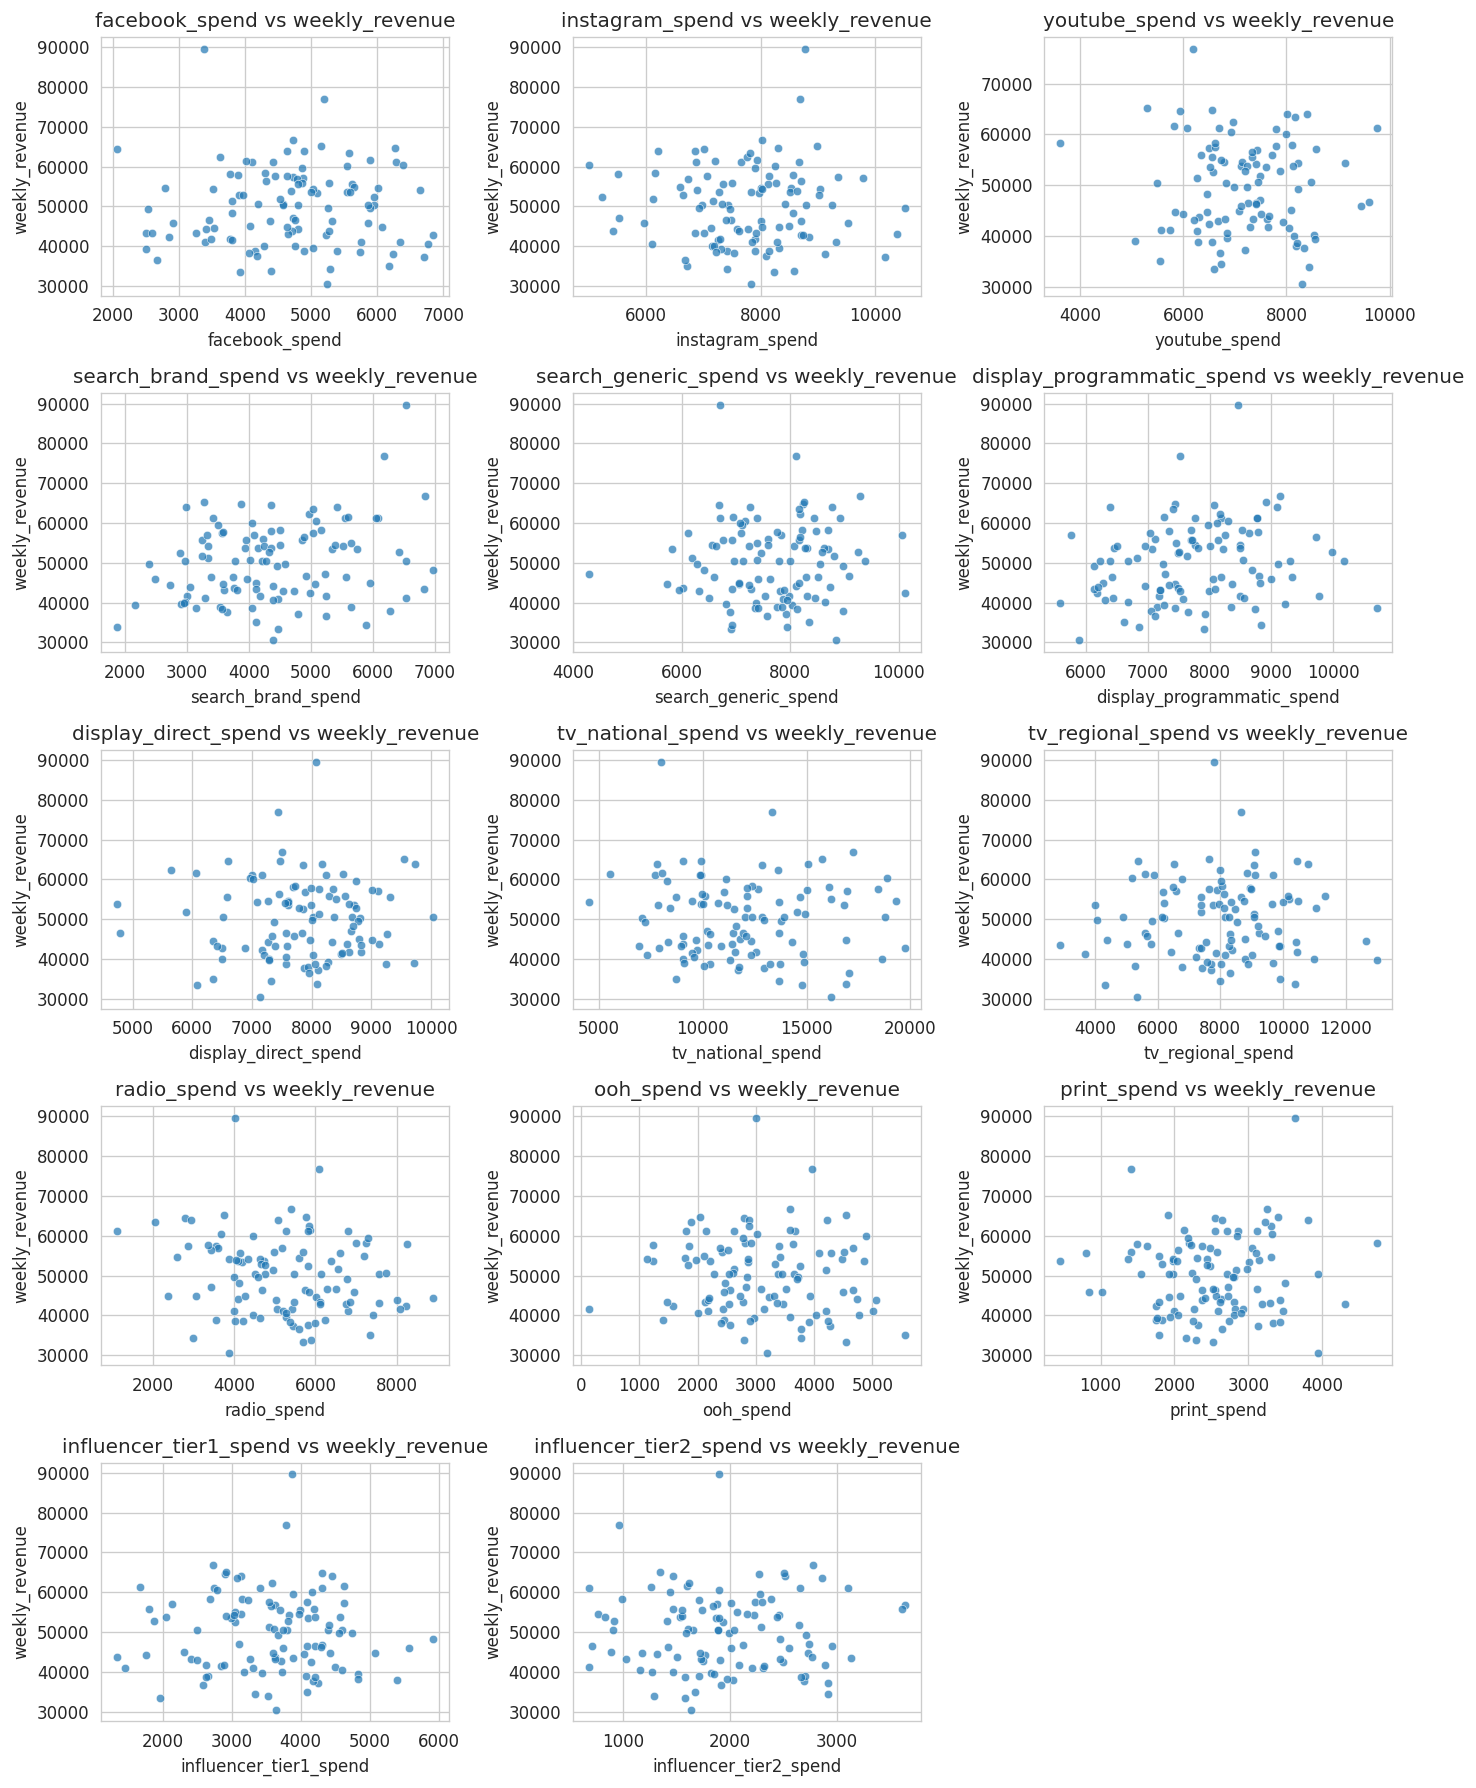

In [47]:
eda.scatter_vs_target(eda.media_cols,"image_3.png")

/home/mohamed/assessment/exercise2/Utils/EDA.py:174: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


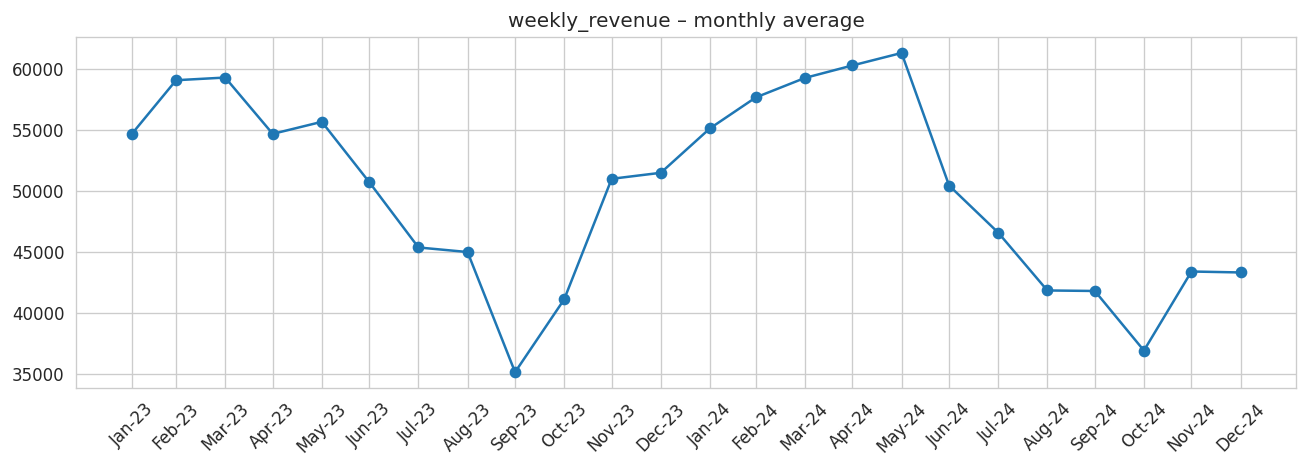

In [48]:
eda.plot_monthly_average()

## Data Cleaning

In [49]:
df.set_index("week",inplace=True)
df.head()

,weekly_revenue,seasonality_index,economic_index,avg_discount_rate,temperature,facebook_spend,facebook_impr,facebook_clicks,instagram_spend,instagram_impr,instagram_clicks,youtube_spend,youtube_impr,youtube_clicks,search_brand_spend,search_brand_impr,search_brand_clicks,search_generic_spend,search_generic_impr,search_generic_clicks,display_programmatic_spend,display_programmatic_impr,display_programmatic_clicks,display_direct_spend,display_direct_impr,display_direct_clicks,tv_national_spend,tv_national_trps,tv_regional_spend,tv_regional_trps,radio_spend,radio_spots,ooh_spend,ooh_faces,print_spend,print_reach,influencer_tier1_spend,influencer_tier2_spend
week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-01,52483.570765,0.000000,99.677429,11.545143,22.476249,5948.463249,0.000690,0.014581,5232.240478,0.000362,0.006929,6574.352195,0.000567,0.011253,2877.652281,0.000247,0.004849,7459.639512,0.000557,0.010397,7496.008218,0.000560,0.008462,7857.451819,0.000572,0.004239,11480.784527,95.673204,8467.571824,105.844648,5812.194092,29,3753.341621,250.222775,2485.042894,309911.245903,3051.473847,1936.681969
2023-01-08,50514.045297,0.120537,100.808102,21.558194,23.645896,4581.454134,0.000532,0.011230,8419.662396,0.000582,0.011149,8478.869362,0.000732,0.014513,3766.581281,0.000323,0.006347,6955.233278,0.000519,0.009694,6384.085144,0.000477,0.007206,8680.118497,0.000632,0.004683,12046.757337,100.389644,4888.228902,61.102861,6138.752935,31,3381.178579,225.411905,1976.972019,246549.410854,4393.439879,1889.406204
2023-01-15,55631.599333,0.239316,103.772372,11.712672,26.309593,5610.112909,0.000651,0.013751,8125.293657,0.000562,0.010760,6549.621504,0.000565,0.011211,3235.323230,0.000278,0.005452,6753.924495,0.000504,0.009413,7697.992661,0.000576,0.008690,9316.968080,0.000679,0.005026,8711.215128,72.593459,8661.800853,108.272511,4135.274787,21,4289.793142,285.986209,803.072206,100151.634632,3991.275845,1736.287162
2023-01-22,61161.198152,0.354605,100.349156,13.406697,23.609060,4103.734452,0.000476,0.010059,7650.151750,0.000529,0.010130,6681.671340,0.000577,0.011437,6090.025960,0.000522,0.010263,6709.148625,0.000501,0.009351,8774.974298,0.000656,0.009905,7174.176320,0.000523,0.003870,7679.907935,63.999233,9667.118506,120.838981,1113.497144,6,3673.241934,244.882796,3118.892360,388959.007294,2744.167776,675.410033
2023-01-29,53476.464847,0.464723,100.515101,12.862005,26.693091,5086.793577,0.000590,0.012469,7972.405161,0.000551,0.010557,7595.920191,0.000656,0.013002,5339.106043,0.000458,0.008997,5826.402476,0.000435,0.008120,7066.475935,0.000528,0.007977,8711.761610,0.000635,0.004700,16783.595966,139.863300,4012.609492,50.157619,4180.714104,21,2861.624793,190.774986,3015.871505,376111.212312,2991.324478,1867.964000


### Null Filling

In [50]:
df_1= df.copy()
df_1.reset_index(inplace=True)
df_1['week'] = pd.to_datetime(df_1['week'])
df_1= df_1.sort_values('week')
df_1.set_index("week",inplace=True)
df_1['youtube_spend'] = df_1['youtube_spend'].interpolate(method='time')
df_1['display_direct_clicks'] = df_1['display_direct_clicks'].interpolate(method='time')

### Outliers Dealing

In [51]:
def outlier_summary(df, cols, iqr_mult=1.5):
    stats = {}
    for col in cols:
        q1, q3 = np.percentile(df[col].dropna(), [25, 75])
        iqr = q3 - q1
        lo, hi = q1 - iqr_mult * iqr, q3 + iqr_mult * iqr
        n_out = df[(df[col] < lo) | (df[col] > hi)][col].count()
        stats[col] = {"lower": lo, "upper": hi, "n_outliers": n_out}
    return stats

def winsorize_outliers(df, summary, max_outliers=2):
    for col, stats in summary.items():
        if stats["n_outliers"] <= max_outliers:
            df[col] = df[col].clip(lower=stats["lower"], upper=stats["upper"])
    return df


### target variable

<Axes: xlabel='weekly_revenue'>

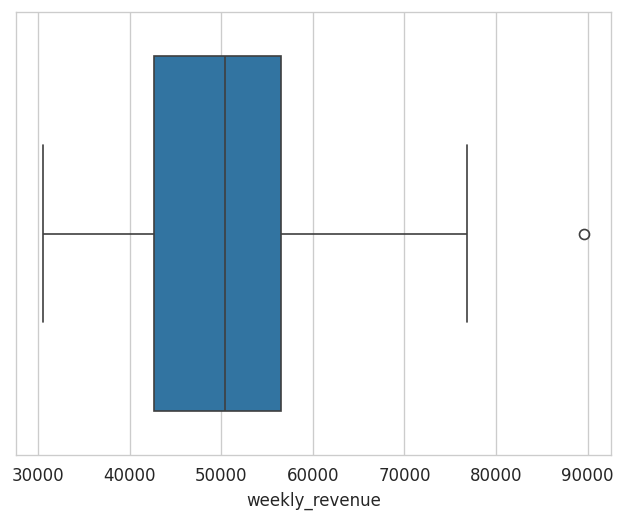

In [52]:
sns.boxplot(x=df["weekly_revenue"])

In [53]:
outlier_row = df[df['weekly_revenue'] == df['weekly_revenue'].max()]
outlier_row

,weekly_revenue,seasonality_index,economic_index,avg_discount_rate,temperature,facebook_spend,facebook_impr,facebook_clicks,instagram_spend,instagram_impr,instagram_clicks,youtube_spend,youtube_impr,youtube_clicks,search_brand_spend,search_brand_impr,search_brand_clicks,search_generic_spend,search_generic_impr,search_generic_clicks,display_programmatic_spend,display_programmatic_impr,display_programmatic_clicks,display_direct_spend,display_direct_impr,display_direct_clicks,tv_national_spend,tv_national_trps,tv_regional_spend,tv_regional_trps,radio_spend,radio_spots,ooh_spend,ooh_faces,print_spend,print_reach,influencer_tier1_spend,influencer_tier2_spend
week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-11-26,89604.963664,-0.568065,100.692896,8.547298,11.83766,3372.3458,0.000391,0.008266,8770.870053,0.000607,0.011614,NaN,0.000746,0.014795,6539.861024,0.000561,0.011021,6700.12233,0.0005,0.009338,8455.962671,0.000632,0.009545,8063.990773,0.000588,0.00435,7998.872641,66.657272,7803.16982,97.539623,4015.607708,20,2997.574669,199.838311,3638.224047,453725.185213,3880.465148,1899.964186


In [54]:
df.describe()

,weekly_revenue,seasonality_index,economic_index,avg_discount_rate,temperature,facebook_spend,facebook_impr,facebook_clicks,instagram_spend,instagram_impr,instagram_clicks,youtube_spend,youtube_impr,youtube_clicks,search_brand_spend,search_brand_impr,search_brand_clicks,search_generic_spend,search_generic_impr,search_generic_clicks,display_programmatic_spend,display_programmatic_impr,display_programmatic_clicks,display_direct_spend,display_direct_impr,display_direct_clicks,tv_national_spend,tv_national_trps,tv_regional_spend,tv_regional_trps,radio_spend,radio_spots,ooh_spend,ooh_faces,print_spend,print_reach,influencer_tier1_spend,influencer_tier2_spend
count,104.000000,1.040000e+02,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,98.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,98.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,50030.497135,1.294371e-17,100.134235,10.262990,20.146461,4684.067034,0.000544,0.011481,7775.435525,0.000538,0.010296,7172.569910,0.000618,0.012256,4397.050469,0.000377,0.007410,7673.702349,0.000573,0.010695,7758.053328,0.000580,0.008757,7828.956987,0.000570,0.004226,11963.594698,99.696622,7947.673009,99.345913,5248.208331,26.192308,3104.503829,206.966922,2517.549098,313965.114895,3563.380401,1945.211831
std,9881.957682,7.105310e-01,1.897485,3.024811,7.931359,1074.584627,0.000125,0.002634,1065.934610,0.000074,0.001412,1017.395830,0.000089,0.001760,1133.780236,0.000097,0.001911,969.528308,0.000072,0.001351,1036.816197,0.000078,0.001170,985.905105,0.000072,0.000547,3261.132395,27.176103,1922.612128,24.032652,1520.166062,7.594169,1027.683481,68.512232,734.085883,91548.307285,900.099462,645.348544
min,30492.231206,-1.000000e+00,96.162458,5.000000,5.866555,2064.333155,0.000240,0.005060,4994.388457,0.000345,0.006614,3609.905380,0.000312,0.006179,1866.302782,0.000160,0.003145,4280.160492,0.000320,0.005965,5584.054375,0.000418,0.006303,4738.016855,0.000345,0.002556,4502.105962,37.517550,2894.136759,36.176709,1113.497144,6.000000,129.413903,8.627594,455.680681,56828.221322,1339.480294,675.336990
25%,42677.955273,-6.844697e-01,98.417215,8.110226,12.760365,3959.408773,0.000460,0.009705,7163.377312,0.000495,0.009486,6550.113056,0.000564,0.011196,3559.477864,0.000305,0.005998,7030.324345,0.000525,0.009798,7107.487776,0.000531,0.008023,7285.049677,0.000531,0.003924,9666.818673,80.556822,6646.196450,83.077456,4118.290112,20.750000,2432.269070,162.151271,2022.974908,252286.459843,2973.482572,1548.800103
50%,50428.593876,1.836970e-16,100.359212,10.201123,20.278686,4727.841730,0.000549,0.011589,7840.725050,0.000542,0.010383,7191.706780,0.000619,0.012282,4297.093175,0.000369,0.007241,7775.573279,0.000581,0.010837,7699.844540,0.000576,0.008692,7915.694616,0.000577,0.004277,11721.289235,97.677410,8086.143704,101.076796,5276.535024,26.000000,2946.335991,196.422399,2531.104757,315655.649545,3633.437082,1891.894225
75%,56563.567422,6.844697e-01,101.193119,12.104556,26.736317,5424.622891,0.000630,0.013297,8513.738225,0.000589,0.011274,7911.926538,0.000685,0.013593,5181.196028,0.000444,0.008731,8300.875814,0.000620,0.011569,8493.042630,0.000635,0.009587,8525.235804,0.000621,0.004632,13814.287211,115.119060,9087.570066,113.594626,6160.364991,31.000000,3770.766012,251.384401,2993.226961,373287.197148,4190.605804,2444.754750
max,89604.963664,1.000000e+00,105.440338,21.558194,36.496498,6847.599189,0.000795,0.016785,10519.262084,0.000728,0.013930,9749.745564,0.000841,0.016689,6979.514068,0.000599,0.011762,10117.982190,0.000755,0.014102,10704.927074,0.000800,0.012084,10037.990731,0.000731,0.005415,19740.925295,164.507711,12986.867384,162.335842,8904.564283,45.000000,5558.906082,370.593739,4736.285977,590665.171891,5920.416657,3638.823253


In [55]:
df['weekly_revenue_log'] = np.log1p(df['weekly_revenue'])
df.drop(columns=["weekly_revenue"],inplace=True)

### indepdenent vars